### Ablation analysis
* Interesting candidates by running each step of pipe seperately, without conjoined outputs+LLM

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
# warnings.filterwarnings("W036")
import logging
logger = logging.getLogger("spacy")
logger.setLevel(logging.ERROR)

logging.basicConfig(level=logging.ERROR)
import pandas as pd
from configs import * ## all configs
from util import *

%load_ext autoreload
%autoreload 2

In [2]:
from Link_semmed_cuis import  * #link_kg_concepts #*
from ukb_target_pipe  import * # make_target_df,model_features#*
from search_pubmed import  * #run_search_pubmed #*

In [3]:
Fast_Run = False
RUN_PIPE = True
# RUN_PIPE = False
# Fast_Run = True

SAVE_OUTPUT = True
# SAVE_OUTPUT = False

# OUTPUT_NAME= "localMini_chol.csv"
OUTPUT_NAME= "localMini_ablation.csv"

DO_KG = True#False # for laptop 

# run_search_pubmed(config, df=df_feat_sel, SAVE_OUTPUTS=True)

In [4]:
# List of all configurations

# ## change from 9 :
# config_gall['K_IPW_RATIO'] = min(config_gall['K_IPW_RATIO'],7)

# all_configs = [config_gall,config_oesophagus, config_gout, config_celiac,  config_asthma] # config_heart, config_eye_occ,, config_spine , config_ms,
# all_configs =[config_depression] # not outputting results for search pubmed correctly? # Error processing Depression: [Errno 2] No such file or directory: 'candidate_novel_cuis_depression.csv'
# all_configs = [config_gall, config_oesophagus,config_gout,]# ,config_celiac, config_gout,
# all_configs = [config_gall, config_oesophagus]
all_configs = [config_gall, config_oesophagus,config_gout]# , config_celiac, config_eye_occ] 


# all_configs = [config_gall, config_oesophagus]

In [5]:
for config in all_configs:
    print("----"*20,"\n",config["TARGET_NAME"],"\n"*2,"----"*20)
    # try:
    if RUN_PIPE:
        print("Running pipeline for:", config["TARGET_NAME"])
        df = make_target_df(TARGET_CODES_LIST=config["TARGET_CODES_LIST"], FAST=Fast_Run)
        print("-------"*15, "\nTarget extracted\n", "-------"*12)
        print(df.shape)
        if config.get("do_IPW", True):
            ### changed!:
            # ## change from 9 default in some :
            
            # config['K_IPW_RATIO'] = min(config['K_IPW_RATIO'],8) # CHANGED
            
            df = ipw_downsampling(df, K_IPW_RATIO=config.get("K_IPW_RATIO", 9))
            print(df.shape, "IPW downsampled")

        if SAVE_OUTPUT:
            df.to_parquet(config["OUTPUT_RES_PREFIX"]+"_test_df.parquet",index=False)

-------------------------------------------------------------------------------- 
 GALLSTONES, Cholelithiasis 

 --------------------------------------------------------------------------------
Running pipeline for: GALLSTONES, Cholelithiasis
6298568 # rows pre assesment date filter
eid                                  int32
YOB                                  int16
Sex                               category
ICD_Code                          category
Diagnosis_Description             category
Diagnosis Date              datetime64[ns]
Age_at_diagnosis                      int8
Z-score-Age_at_diagnosis           float32
instance0_date              datetime64[ns]
dtype: object
eid                         440004
YOB                             37
Sex                              2
ICD_Code                     10151
Diagnosis_Description         8975
Diagnosis Date                9641
Age_at_diagnosis                61
Z-score-Age_at_diagnosis    352166
instance0_date                1068


In [6]:
# model_features(df=df.sample(2000).iloc[:,0:200], FAST=Fast_Run, do_boruta_fs=False,
#                           SAVE_OUTPUT=SAVE_OUTPUT, FEATURES_REPORT_PATH=config["FEATURES_REPORT_PATH"],
#                           keep_top_k_only=True, # keep top ~300 feats by MI; speed things up; not working!
#                          do_mi_fs_filt=True)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

 GALLSTONES, Cholelithiasis 

 -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
(91590, 1731)


,eid,YOB,Sex,instance0_date,y,past disease history - Age_at_diagnosis,past disease history - Z-score-Age_at_diagnosis,had_disease_past,age,cutoff_date,...,Date of vascular dementia report,Behavioural and miscellaneous addictions,Ever addicted to any substance or behaviour,Ongoing addiction or dependence on illicit or recreational drugs,Ever addicted to a behaviour or miscellanous,Ever addicted to illicit or recreational drugs,Date elapsed of all cause dementia report,Date elapsed of alzheimer's disease report,Date elapsed of vascular dementia report,age_X_sex
0,3893629,1951,0,2008-06-20,1,NaN,NaN,False,58,2009-11-13,...,NaT,None,No,None,None,None,NaN,NaN,NaN,-1
1,2971195,1956,0,2009-10-30,1,NaN,NaN,False,65,2021-07-09,...,NaT,None,None,None,None,None,NaN,NaN,NaN,-1


(91590, 1620)
mean        0.1
sum      9159.0
size    91590.0
Name: y, dtype: float64
X_encoded cols 526
127 # discrete feats
365
377 # MI selected features in initial leaky filter
(91590, 376)
368
Medication for cholesterol, blood pressure or diabetes Medication                     10
Overall health rating                                                                  6
Long-standing illness, disability or infirmity                                         4
Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones      27
Medication for cholesterol, blood pressure or diabetes                                10
(non-UK origin) Country of Birth                                                     149
Major dietary changes in the last 5 years                                              4
Job code at visit                                                                    353
Alcohol intake frequency.                                                              7
H

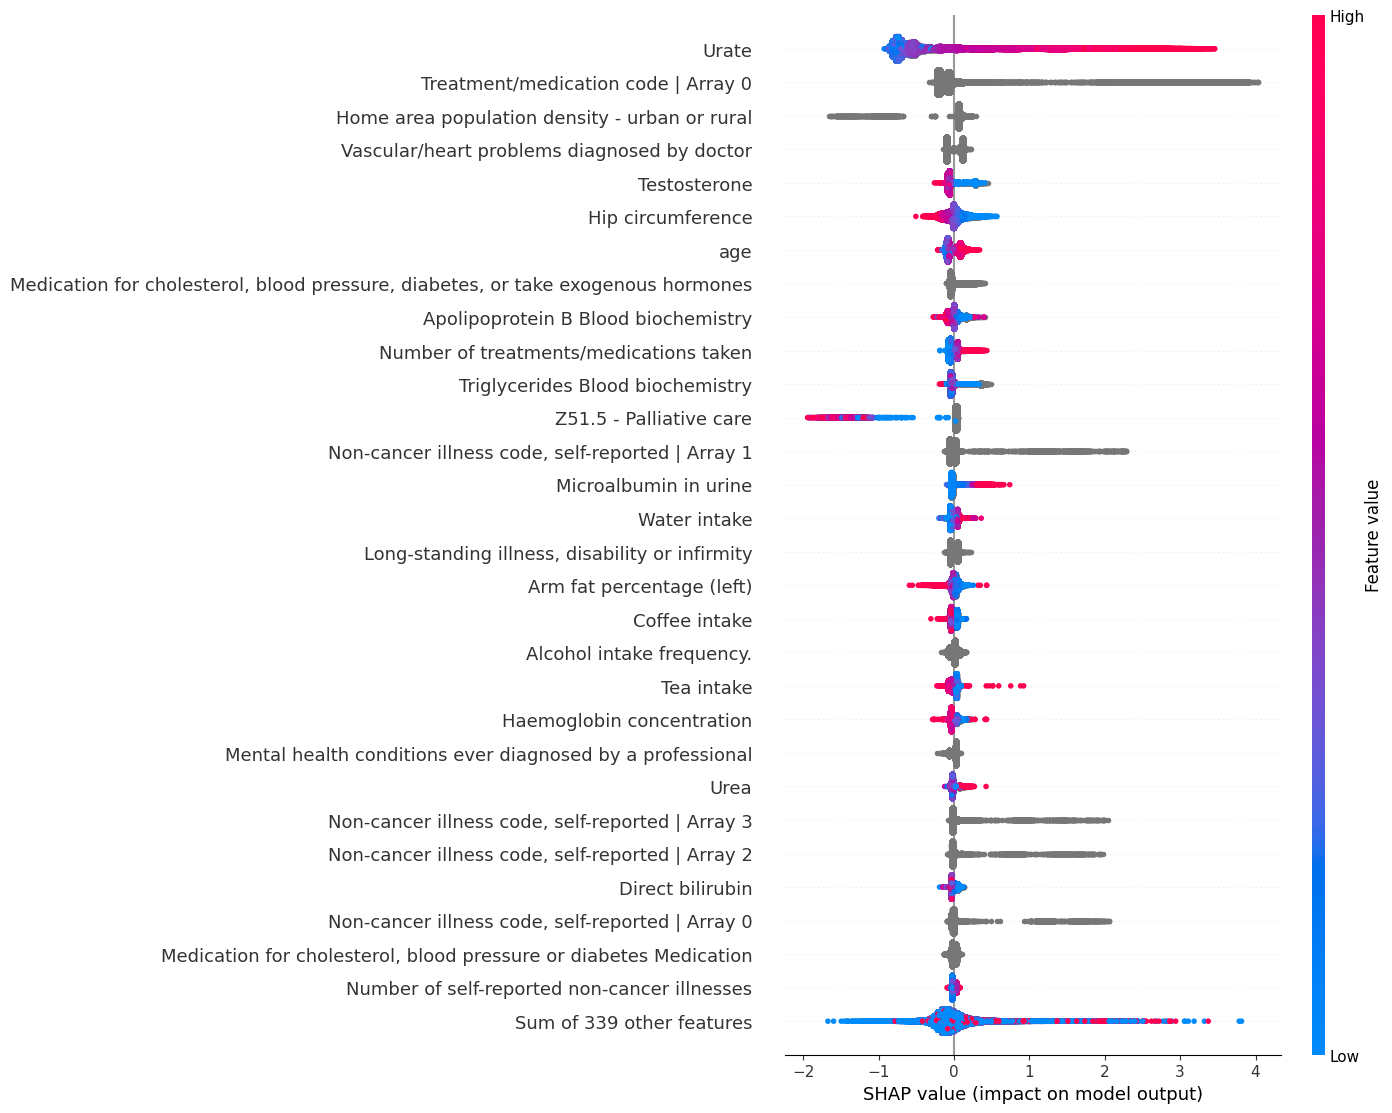

None

368
294
text_cols ['(non-UK origin) Country of Birth', 'Job code at visit', 'Non-cancer illness code, self-reported | Array 4', 'Non-cancer illness code, self-reported | Array 6', 'Non-cancer illness code, self-reported | Array 5', 'Non-cancer illness code, self-reported | Array 0', 'Non-cancer illness code, self-reported | Array 2', 'Non-cancer illness code, self-reported | Array 3', 'Mental health conditions ever diagnosed by a professional', 'Non-cancer illness code, self-reported | Array 1', 'Treatment/medication code | Array 0']
[ColumnTransformer] .......... (1 of 13) Processing num, total=   1.4s
[ColumnTransformer] .......... (2 of 13) Processing cat, total=   0.5s
[ColumnTransformer]  (3 of 13) Processing text_(non-UK origin) Country of Birth, total=   0.1s
[ColumnTransformer]  (4 of 13) Processing text_Job code at visit, total=   0.2s
[ColumnTransformer]  (5 of 13) Processing text_Non-cancer illness code, self-reported | Array 4, total=   0.1s
[ColumnTransformer]  (6 of 13) P

Found a NULL input array in _cext_dense_tree_update_weights!


Non interventional explainer
Get Shap vals:


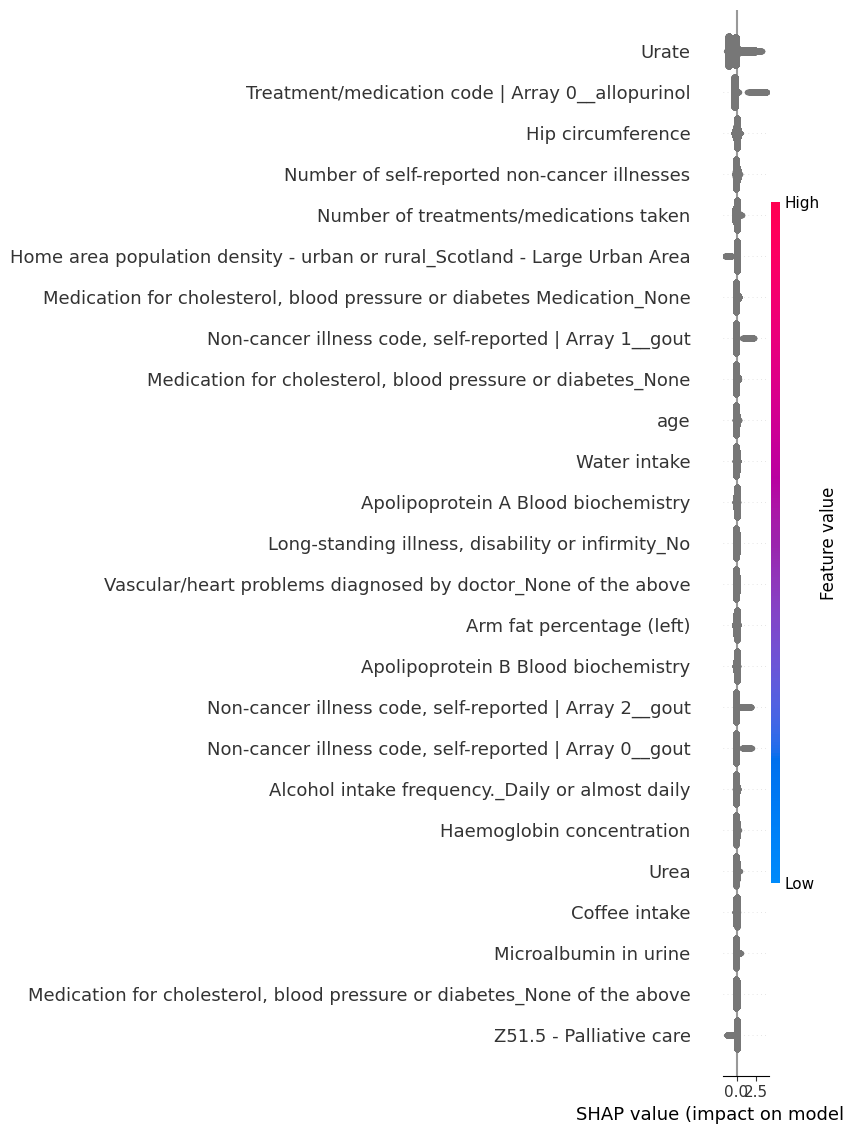

(91590, 2740)
2740 #all Features
1838 # minimally filtered features


/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values fo

1838 # feat after second filt
Getting lift stats
gallstone_ipw_broad_feature_report.csv Saved
cutoff_shap: 0.0002
After filtering KG min count
12915192
TARGET_NAME (For Entity-KG linking GALLSTONES, Cholelithiasis
All ents (GALLSTONES, Cholelithiasis)
GALLSTONES C0008350
Cholelithiasis C0008350

--------------------------

Name:  GALLSTONES
CUI: C0008350, Name: Cholelithiasis
Definition: Presence or formation of GALLSTONES in the BILIARY TRACT, usually in the gallbladder (CHOLECYSTOLITHIASIS) or the common bile duct (CHOLEDOCHOLITHIASIS).
TUI(s): T047
Aliases (abbreviated, total: 25): 
	 Gallstone Diseases, Calculus in biliary tract, Calculus in biliary tract (disorder), GALLSTONES, calculus of gallbladder, cholelithiases, cholelithiasis, GALL STONE, Gallstone Disease, gallbladder stones
CUI: C0242216, Name: Biliary calculi
Definition: Solid crystalline precipitates in the BILIARY TRACT, usually formed in the GALLBLADDER, resulting in the condition of CHOLELITHIASIS. Gallstones, derive

/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/scispacy/abbreviation.py:248: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  global_matches = self.global_matcher(doc)
/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/scispacy/abbreviation.py:248: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  global_matches = self.global_matcher(doc)
/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/scispacy/abbreviation.py:248: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  global_matches = self.global_matcher(doc)
/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/scispacy/abbreviation.py:248: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  global_matches = self.global_matcher(doc)
/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/scispacy/abbreviation.py:248: UserWarning: [W036] The component 

108 - No Entity feats:['Medication for cholesterol, blood pressure or diabetes Medication Blood pressure medication', 'Mental health conditions ever diagnosed by a professional group', 'medication arcoxia', 'Home area population density - urban or rural Scotland - Large Urban Area', 'Qualifications College or University degree|NVQ or HND or HNC or equivalent', 'Concentration of Large LDL Particles', 'Triglycerides Blood biochemistry', 'medication atenolol', 'medication tablet', 'Complications of transplants and reattached limbs', 'Concentration of Small LDL Particles', 'Age angina diagnosed', 'Job code at visit maintenance fitters', 'Long-standing illness, disability or infirmity', 'renal kidney', 'Cholesterol in Small VLDL', 'Job code at visit officers', 'Qualifications College or University degree', 'R29.6 - Tendency to fall, not elsewhere classified', 'Medication for cholesterol, blood pressure or diabetes Blood pressure medication', 'Qualifications College or University degree|O le

Calculating Paths: 100%|███████████████████████████████████████████████████████████████████████████| 268/268 [00:17<00:00, 15.00it/s]


(268, 3) df_path_lengths
(463, 19) df_hits
candidate_novel_cuis_chol.csv
feature_name             202
cui                      237
cui_nomenclature         237
cui_def                  237
raw_name                 202
F.Split-Feature Split    202
dtype: int64


,feature_name,cui,cui_nomenclature,cui_def,KG_Hits,sim_score,feature_level_min_kg_hits,feature_level_sum_kg_hits,feature_level_avg_kg_hits,feature_importance,p_val,corr,MutualInfoTarget,raw_name,F.Split-Lift (y==1),F.Split-Support,F.Split-Feature Split,sim_score_target_feat,sim_score_target_cui,shortest_path_length
0,Urate,C0729829,Urate level - finding,Urate level - finding.,0,0.759,0.0,0.0,0.0,0.8047,0.0,0.214,0.0667,Urate,4.68,1792,2.10 <= Urate < 2.90,0.18,0.29,2
1,Urate,C0935936,Urate,"Urate. 2,6,8-trioxypurine.",0,0.778,0.0,0.0,0.0,0.8047,0.0,0.214,0.0667,Urate,4.68,1792,2.10 <= Urate < 2.90,0.18,0.29,2
2,medication allopurinol,C0002144,allopurinol,allopurinol. A XANTHINE OXIDASE inhibitor that...,0,0.884,0.0,0.0,0.0,0.3097,0.0,0.392,0.0414,Treatment/medication code | Array 0__allopurinol,6.97,3425,Treatment/medication code | Array 0__allopurin...,0.19,0.22,2
3,Number of self-reported non-cancer illnesses,C2700446,Self-Report,Self-Report. An individual's perspective or su...,0,0.411,0.0,0.0,0.0,0.0880,0.0,0.138,0.0101,Number of self-reported non-cancer illnesses,2.36,1149,Number of self-reported non-cancer illnesses >...,0.02,0.02,2
4,Home area population density - urban or rural ...,C0178587,density,density. The amount of something per unit size.,0,0.243,0.0,0.0,0.0,0.0779,0.0,-0.052,0.0018,Home area population density - urban or rural_...,1.04,87079,Home area population density - urban or rural_...,-0.08,-0.08,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Overall health rating Poor,,,,0,1.000,0.0,0.0,0.0,0.0033,0.0,0.056,0.0014,Overall health rating_Poor,1.60,6756,Overall health rating_Poor >= 0.50,-0.05,-0.05,2
459,Alcohol intake frequency. One to three times a...,,,,0,1.000,0.0,0.0,0.0,0.0013,0.0,-0.028,0.0004,Alcohol intake frequency._One to three times a...,1.03,82577,Alcohol intake frequency._One to three times a...,0.02,0.09,2
460,Hip circumference,,,,0,1.000,0.0,0.0,0.0,0.0957,0.0,0.022,0.0023,Hip circumference,1.21,1302,2.80 <= Hip circumference < 4.50,-0.08,-0.08,2
461,Concentration of IDL Particles,,,,0,1.000,0.0,0.0,0.0,0.0022,0.0,-0.033,0.0604,Concentration of IDL Particles,1.43,2252,-3.80 <= Concentration of IDL Particles < -2.40,0.01,0.09,2


['medication allopurinol', 'Home area population density - urban or rural Scotland - Large Urban Area', 'gout', 'Long-standing illness, disability or infirmity', 'Vascular/heart problems diagnosed by doctor None of the above', 'Arm fat percentage', 'Apolipoprotein B Blood biochemistry', 'Alcohol intake frequency. Daily or almost daily']
['Treatment/medication code | Array 0 allopurinol', 'Home area population density - urban or rural_Scotland - Large Urban Area', 'Medication for cholesterol, blood pressure or diabetes Medication_None', 'Non-cancer illness code, self-reported | Array 1 gout', 'Medication for cholesterol, blood pressure or diabetes_None', 'Long-standing illness, disability or infirmity_No', 'Vascular/heart problems diagnosed by doctor_None of the above', 'Arm fat percentage (left)']
Targets: ['(Cholelithiasis) OR (Gallstone) OR (Gallbladder disease) OR (cholecystitis) OR (Cholangitis)']
NOTE: Imputing KG_Hits col
250 # df_query rows
name                         250
featu

Targets: ['(Cholelithiasis) OR (Gallstone) OR (Gallbladder disease) OR (cholecystitis) OR (Cholangitis)']


33 boring_feature_names
 ['Age high blood pressure diagnosed_59', 'Medication for cholesterol, blood pressure or diabetes_None', 'Abnormal findings examination of lungs', 'Hip circumference', 'Apolipoprotein A1', 'Apolipoprotein B', 'Age high blood pressure diagnosed_None', 'Cholesterol in Very Large HDL', 'Vascular/heart problems diagnosed by doctor_Heart attack|High blood pressure', 'Albumin', 'Age high blood pressure diagnosed_23', 'Cholesterol in Small HDL', '(HDL) high density lipoprotein cholesterol genetic risk', 'Coffee intake', 'Age high blood pressure diagnosed_Do not know', 'Abdominal pain', 'Age diabetes diagnosed', 'Alanine', 'Alcohol-related disorders', 'Alcoholism', 'Complications of surgical and medical procedures', 'Diaphragmatic hernia', 'Direct bilirubin', 'Diverticulosis', 'GERD', 'Gastritis and duodenitis', 'Hypercholesterolemia', 'Septicemia', 'Sex', 'Umbilical hernia', 'Y83.8 - Other surgical procedures', 'Z53.8 - Procedure not carried out for other reasons', 'ag

Targets: ['(Cholelithiasis) OR (Gallstone) OR (Gallbladder disease) OR (cholecystitis) OR (Cholangitis)']


Query                    143
name                     143
raw_name                 143
F.Split-Feature Split    143
feature_name             143
cui                        0
Target                     1
dtype: int64
90 # rows after feature_level_avg_kg_hits filter
90 # rows after (local)sim_score filter
90 # rows after query-target count filter
88
143 # Overall candidate features
88 # Top pick candidate features
88
90 # rows after feature_level_avg_kg_hits filter
90 # rows after (local)sim_score filter
90 # rows after query-target count filter
88
['Apolipoprotein B Blood biochemistry', 'Non-cancer illness code, self-reported | Array 2 gout', 'Microalbumin in urine', 'Non-cancer illness code, self-reported | Array 3 gout', 'Long-standing illness, disability or infirmity_Yes', 'Tea intake', 'Qualifications_None of the above', '(MS) multiple sclerosis genetic risk', 'Home area population density - urban or rural_Scotland - Other Urban Area', 'had_disease_past', 'Atrial fibrillation and fl

,feature_name,feature_importance,corr,source-shap,source-KG,source-lit,source-Joint-Shap_Lit
0,(AD) alzheimer's disease genetic risk,0.0,0.0,0,0,0,1
1,(CVD) cardiovascular disease genetic risk,0.0,0.0,0,0,0,1
2,(HT) hypertension genetic risk,0.0,0.0,0,0,0,1
3,(MS) multiple sclerosis genetic risk,0.019,0.0,0,0,1,1
4,(RA) rheumatoid arthritis genetic risk,0.0,0.0,0,0,0,1
5,(VTE) venous thromboembolic disease genetic risk,0.0,0.0,0,0,0,1
6,Alcohol intake frequency._Daily or almost daily,0.036,0.0,0,1,0,0
7,Apolipoprotein A Blood biochemistry,0.048,-0.012,1,1,1,1
8,Apolipoprotein B Blood biochemistry,0.039,0.0,0,1,1,1
9,Apolipoprotein B to Apolipoprotein A1 ratio,0.0,0.0,0,0,0,1


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

 Esophageal cancer 

 -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
(91590, 1731)


,eid,YOB,Sex,instance0_date,y,past disease history - Age_at_diagnosis,past disease history - Z-score-Age_at_diagnosis,had_disease_past,age,cutoff_date,...,Date of vascular dementia report,Behavioural and miscellaneous addictions,Ever addicted to any substance or behaviour,Ongoing addiction or dependence on illicit or recreational drugs,Ever addicted to a behaviour or miscellanous,Ever addicted to illicit or recreational drugs,Date elapsed of all cause dementia report,Date elapsed of alzheimer's disease report,Date elapsed of vascular dementia report,age_X_sex
0,3893629,1951,0,2008-06-20,1,NaN,NaN,False,58,2009-11-13,...,NaT,None,No,None,None,None,NaN,NaN,NaN,-1
1,2971195,1956,0,2009-10-30,1,NaN,NaN,False,65,2021-07-09,...,NaT,None,None,None,None,None,NaN,NaN,NaN,-1


(91590, 1620)
mean        0.1
sum      9159.0
size    91590.0
Name: y, dtype: float64
X_encoded cols 531
127 # discrete feats
373
385 # MI selected features in initial leaky filter
(91590, 384)
374
Medication for cholesterol, blood pressure or diabetes Medication                     10
Overall health rating                                                                  6
Long-standing illness, disability or infirmity                                         4
Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones      27
Medication for cholesterol, blood pressure or diabetes                                10
(non-UK origin) Country of Birth                                                     149
Major dietary changes in the last 5 years                                              4
Job code at visit                                                                    353
Alcohol intake frequency.                                                              7
H

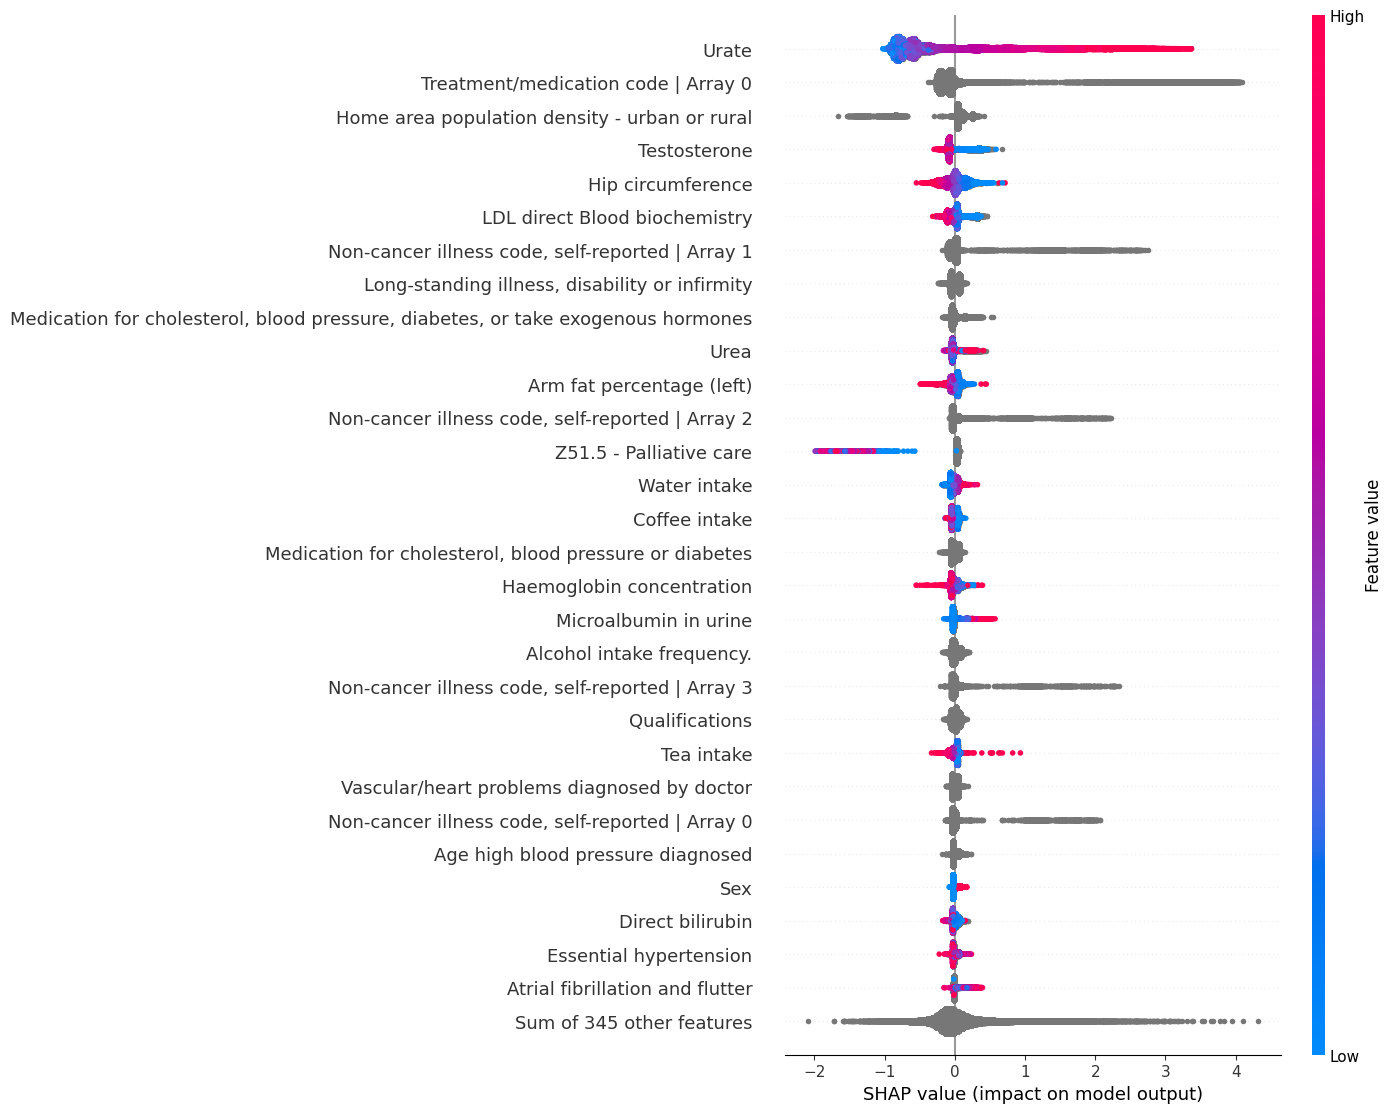

None

374
324
text_cols ['(non-UK origin) Country of Birth', 'Non-cancer illness code, self-reported | Array 6', 'Job code at visit', 'Non-cancer illness code, self-reported | Array 4', 'Non-cancer illness code, self-reported | Array 5', 'Mental health conditions ever diagnosed by a professional', 'Non-cancer illness code, self-reported | Array 0', 'Non-cancer illness code, self-reported | Array 3', 'Non-cancer illness code, self-reported | Array 2', 'Non-cancer illness code, self-reported | Array 1', 'Treatment/medication code | Array 0']
[ColumnTransformer] .......... (1 of 13) Processing num, total=   1.6s
[ColumnTransformer] .......... (2 of 13) Processing cat, total=   0.5s
[ColumnTransformer]  (3 of 13) Processing text_(non-UK origin) Country of Birth, total=   0.1s
[ColumnTransformer]  (4 of 13) Processing text_Non-cancer illness code, self-reported | Array 6, total=   0.1s
[ColumnTransformer]  (5 of 13) Processing text_Job code at visit, total=   0.2s
[ColumnTransformer]  (6 of 13) P

Found a NULL input array in _cext_dense_tree_update_weights!


Non interventional explainer
Get Shap vals:


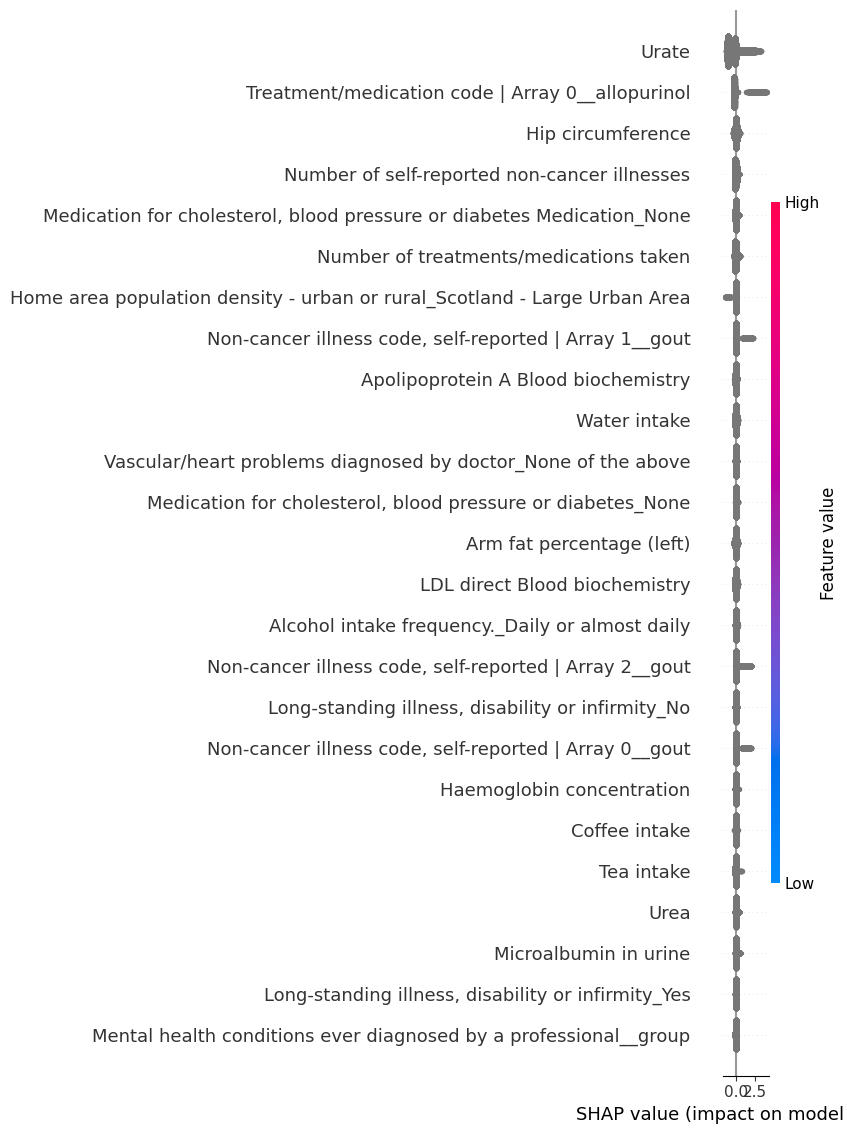

(91590, 2770)
2770 #all Features
1871 # minimally filtered features


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

1871 # feat after second filt
Getting lift stats
oesophagus_feature_report.csv Saved
cutoff_shap: 0.00021
After filtering KG min count
12915192
TARGET_NAME (For Entity-KG linking Esophageal cancer
All ents (Esophageal cancer,)
Esophageal cancer C0014859

--------------------------

Name:  Esophageal cancer
CUI: C0014859, Name: Esophageal Neoplasms
Definition: Tumors or cancer of the ESOPHAGUS.
TUI(s): T191
Aliases (abbreviated, total: 39): 
	 Esophagus Neoplasm, Neoplasm, Esophagus, Esophageal Tumors, Neoplasm, Esophageal, Esophagus Tumor, Tumor of the Esophagus, esophageal tumor, esophagus neoplasm, Neoplasms, Esophagus, Esophagus--Tumors
CUI: C0152018, Name: Esophageal carcinoma
Definition: A malignant epithelial tumor arising from the esophageal mucosa. Two major histologic types of esophageal carcinoma have been described: squamous cell carcinoma and adenocarcinoma. This type of cancer is associated with excessive ethanol and cigarette usage.
TUI(s): T191
Aliases (abbreviated, tota

/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/scispacy/abbreviation.py:248: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  global_matches = self.global_matcher(doc)
/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/scispacy/abbreviation.py:248: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  global_matches = self.global_matcher(doc)
/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/scispacy/abbreviation.py:248: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  global_matches = self.global_matcher(doc)
/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/scispacy/abbreviation.py:248: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  global_matches = self.global_matcher(doc)
/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/scispacy/abbreviation.py:248: UserWarning: [W036] The component 

109 - No Entity feats:['Medication for cholesterol, blood pressure or diabetes Medication Blood pressure medication', 'Mental health conditions ever diagnosed by a professional group', 'medication arcoxia', 'Home area population density - urban or rural Scotland - Large Urban Area', 'Concentration of Large LDL Particles', 'Neuroticism score', 'medication tablet', 'Complications of transplants and reattached limbs', 'M19.99 - Arthrosis, unspecified (Site unspecified)', 'Concentration of Small LDL Particles', 'Long-standing illness, disability or infirmity', 'Cholesterol in Very Small VLDL', 'Vascular/heart problems diagnosed by doctor Angina', 'Qualifications A levels/AS levels or equivalent|O levels/GCSEs or equivalent|Other professional qualifications eg: nursing, teaching', 'Job code at visit officers', 'Job code at visit sales', 'Medication for cholesterol, blood pressure or diabetes Blood pressure medication', 'Z13.9 - Special screening examination, unspecified', 'Qualifications A 

Calculating Paths: 100%|███████████████████████████████████████████████████████████████████████████| 284/284 [00:18<00:00, 15.51it/s]


(284, 3) df_path_lengths
(484, 19) df_hits
candidate_novel_oesophagus.csv
feature_name             212
cui                      276
cui_nomenclature         276
cui_def                  276
raw_name                 212
F.Split-Feature Split    212
dtype: int64


,feature_name,cui,cui_nomenclature,cui_def,KG_Hits,sim_score,feature_level_min_kg_hits,feature_level_sum_kg_hits,feature_level_avg_kg_hits,feature_importance,p_val,corr,MutualInfoTarget,raw_name,F.Split-Lift (y==1),F.Split-Support,F.Split-Feature Split,sim_score_target_feat,sim_score_target_cui,shortest_path_length
0,Urate,C0729829,Urate level - finding,Urate level - finding.,0,0.759,0.0,0.0,0.0,0.8095,0.0,0.214,0.0667,Urate,4.68,1792,2.10 <= Urate < 2.90,0.11,0.11,2
1,Urate,C0935936,Urate,"Urate. 2,6,8-trioxypurine.",0,0.778,0.0,0.0,0.0,0.8095,0.0,0.214,0.0667,Urate,4.68,1792,2.10 <= Urate < 2.90,0.11,0.11,2
2,medication allopurinol,C0002144,allopurinol,allopurinol. A XANTHINE OXIDASE inhibitor that...,0,0.884,0.0,0.0,0.0,0.3057,0.0,0.392,0.0414,Treatment/medication code | Array 0__allopurinol,6.97,3425,Treatment/medication code | Array 0__allopurin...,0.07,0.07,2
3,Number of self-reported non-cancer illnesses,C2700446,Self-Report,Self-Report. An individual's perspective or su...,0,0.411,0.0,0.0,0.0,0.0883,0.0,0.138,0.0101,Number of self-reported non-cancer illnesses,2.36,1149,Number of self-reported non-cancer illnesses >...,0.08,0.08,2
4,Home area population density - urban or rural ...,C0178587,density,density. The amount of something per unit size.,0,0.243,0.0,0.0,0.0,0.0804,0.0,-0.052,0.0018,Home area population density - urban or rural_...,1.04,87079,Home area population density - urban or rural_...,-0.03,0.08,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,Alcohol intake frequency. One to three times a...,,,,0,1.000,0.0,0.0,0.0,0.0026,0.0,-0.028,0.0004,Alcohol intake frequency._One to three times a...,1.03,82577,Alcohol intake frequency._One to three times a...,0.05,0.08,2
480,Hip circumference,,,,0,1.000,0.0,0.0,0.0,0.0954,0.0,0.022,0.0023,Hip circumference,1.21,1302,2.80 <= Hip circumference < 4.50,-0.05,-0.05,2
481,Concentration of IDL Particles,,,,0,1.000,0.0,0.0,0.0,0.0025,0.0,-0.033,0.0604,Concentration of IDL Particles,1.43,2252,-3.80 <= Concentration of IDL Particles < -2.40,0.04,0.04,2
482,Job code at visit nurses,,,,0,1.000,0.0,0.0,0.0,0.0003,0.0,-0.014,0.0001,Job code at visit__nurses,1.00,90893,Job code at visit__nurses < 0.25,-0.05,-0.05,2


['medication allopurinol', 'Home area population density - urban or rural Scotland - Large Urban Area', 'gout', 'Vascular/heart problems diagnosed by doctor None of the above', 'Arm fat percentage', 'Long-standing illness, disability or infirmity', 'Haemoglobin concentration', 'Coffee intake', 'Urea']
['Treatment/medication code | Array 0 allopurinol', 'Medication for cholesterol, blood pressure or diabetes Medication_None', 'Home area population density - urban or rural_Scotland - Large Urban Area', 'Non-cancer illness code, self-reported | Array 1 gout', 'Water intake', 'Vascular/heart problems diagnosed by doctor_None of the above', 'Medication for cholesterol, blood pressure or diabetes_None', 'Arm fat percentage (left)', 'Alcohol intake frequency._Daily or almost daily']
Targets: ['oesophagus cancer']
NOTE: Imputing KG_Hits col
250 # df_query rows
name                         250
feature_importance           200
p_val                        133
corr                         105
cor

Targets: ['oesophagus cancer']


34 boring_feature_names
 ['Basophill count', 'Alcohol-related disorders', 'Non-cancer illness code, self-reported | Array 3 chronic', 'Hyposmolality and/or hyponatremia', 'Alcohol intake frequency._Once or twice a week', 'Abnormal findings examination of lungs', 'Non-cancer illness code, self-reported | Array 1 kidney', 'Coffee intake', 'Alcohol intake frequency._Three or four times a week', 'Abdominal pain', 'Albumin', 'Alcohol intake frequency._Never', 'Alcoholism', 'Benign neoplasm of colon', 'Cancer of bronchus; lung', 'Cancer of prostate', 'Chemotherapy', 'Complications of surgical and medical procedures', 'Diaphragmatic hernia', 'Diverticulosis', 'Epistaxis or throat hemorrhage', 'GERD', 'Gastritis and duodenitis', 'Malignant neoplasm, other', 'Non-cancer illness code, self-reported | Array 2 pulmonary', 'Secondary malignancy of lymph nodes', 'Sex', 'Shortness of breath', 'Tea intake', 'Total protein', 'Water intake', 'Y83.8 - Other surgical procedures', 'Z09.0 - Follow-up examin

Targets: ['oesophagus cancer']


Query                    153
name                     153
raw_name                 153
F.Split-Feature Split    153
feature_name             153
cui                        0
Target                     1
dtype: int64
107 # rows after feature_level_avg_kg_hits filter
107 # rows after (local)sim_score filter
107 # rows after query-target count filter
105
153 # Overall candidate features
105 # Top pick candidate features
105
107 # rows after feature_level_avg_kg_hits filter
107 # rows after (local)sim_score filter
107 # rows after query-target count filter
105
['Non-cancer illness code, self-reported | Array 2 gout', 'Microalbumin in urine', 'Long-standing illness, disability or infirmity_Yes', 'Qualifications_None of the above', 'Non-cancer illness code, self-reported | Array 3 gout', '(MS) multiple sclerosis genetic risk', 'Medication for cholesterol, blood pressure or diabetes_None of the above', '(HDL) high density lipoprotein cholesterol genetic risk', 'SHBG']
------------------------

,feature_name,feature_importance,corr,source-shap,source-KG,source-lit,source-Joint-Shap_Lit
0,(AMD) age-related macular degeneration genetic...,0.0,0.0,0,0,0,1
1,(CVD) cardiovascular disease genetic risk,0.0,0.0,0,0,0,1
2,(HDL) high density lipoprotein cholesterol gen...,0.014,0.0,0,0,1,1
3,(HT) hypertension genetic risk,0.0,0.0,0,0,0,1
4,(MS) multiple sclerosis genetic risk,0.023,0.0,0,0,1,1
5,(RA) rheumatoid arthritis genetic risk,0.0,0.0,0,0,0,1
6,(T2D) type 2 diabetes genetic risk,0.0,0.0,0,0,0,1
7,Alcohol intake frequency._Daily or almost daily,0.042,0.057,1,0,0,0
8,Apolipoprotein A Blood biochemistry,0.054,-0.012,1,1,1,1
9,Apolipoprotein A1,0.0,0.0,0,0,0,1


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

 Gout 

 -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
(91590, 1731)


,eid,YOB,Sex,instance0_date,y,past disease history - Age_at_diagnosis,past disease history - Z-score-Age_at_diagnosis,had_disease_past,age,cutoff_date,...,Date of vascular dementia report,Behavioural and miscellaneous addictions,Ever addicted to any substance or behaviour,Ongoing addiction or dependence on illicit or recreational drugs,Ever addicted to a behaviour or miscellanous,Ever addicted to illicit or recreational drugs,Date elapsed of all cause dementia report,Date elapsed of alzheimer's disease report,Date elapsed of vascular dementia report,age_X_sex
0,3893629,1951,0,2008-06-20,1,NaN,NaN,False,58,2009-11-13,...,NaT,None,No,None,None,None,NaN,NaN,NaN,-1
1,2971195,1956,0,2009-10-30,1,NaN,NaN,False,65,2021-07-09,...,NaT,None,None,None,None,None,NaN,NaN,NaN,-1


(91590, 1620)
mean        0.1
sum      9159.0
size    91590.0
Name: y, dtype: float64
X_encoded cols 527
127 # discrete feats
372
384 # MI selected features in initial leaky filter
(91590, 383)
373
Medication for cholesterol, blood pressure or diabetes Medication                     10
Overall health rating                                                                  6
Long-standing illness, disability or infirmity                                         4
Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones      27
Medication for cholesterol, blood pressure or diabetes                                10
(non-UK origin) Country of Birth                                                     149
Major dietary changes in the last 5 years                                              4
Job code at visit                                                                    353
Alcohol intake frequency.                                                              7
H

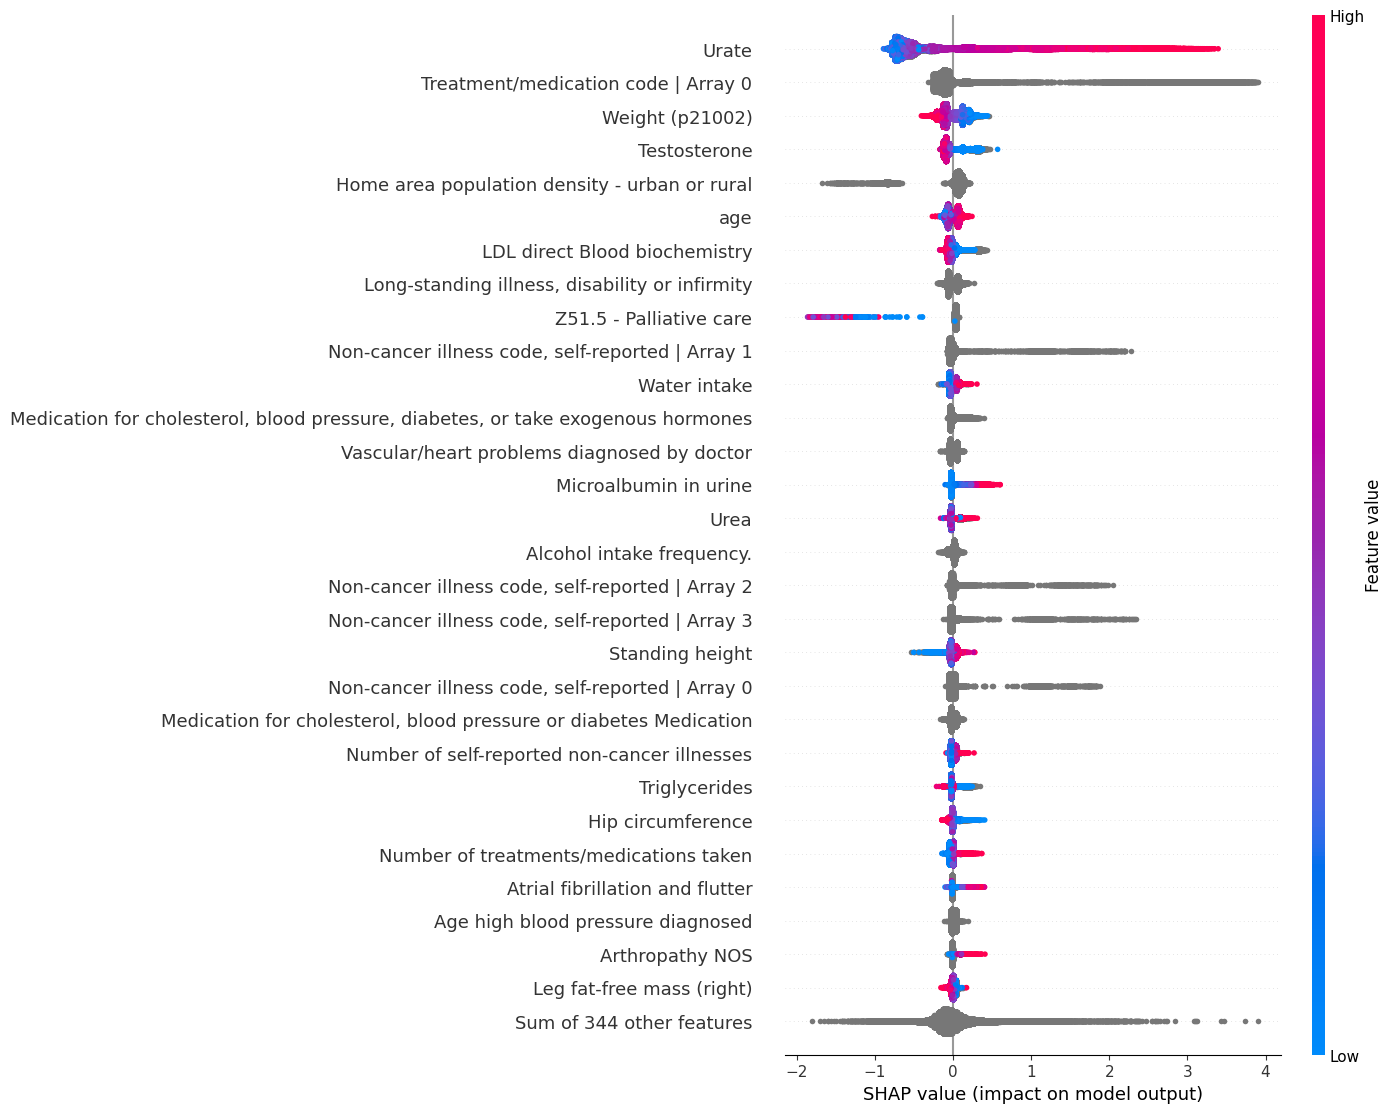

None

373
270
text_cols ['(non-UK origin) Country of Birth', 'Job code at visit', 'Non-cancer illness code, self-reported | Array 5', 'Non-cancer illness code, self-reported | Array 4', 'Non-cancer illness code, self-reported | Array 6', 'Mental health conditions ever diagnosed by a professional', 'Non-cancer illness code, self-reported | Array 0', 'Non-cancer illness code, self-reported | Array 3', 'Non-cancer illness code, self-reported | Array 2', 'Non-cancer illness code, self-reported | Array 1', 'Treatment/medication code | Array 0']
[ColumnTransformer] .......... (1 of 13) Processing num, total=   1.1s
[ColumnTransformer] .......... (2 of 13) Processing cat, total=   0.5s
[ColumnTransformer]  (3 of 13) Processing text_(non-UK origin) Country of Birth, total=   0.1s
[ColumnTransformer]  (4 of 13) Processing text_Job code at visit, total=   0.2s
[ColumnTransformer]  (5 of 13) Processing text_Non-cancer illness code, self-reported | Array 5, total=   0.1s
[ColumnTransformer]  (6 of 13) P

Found a NULL input array in _cext_dense_tree_update_weights!


Non interventional explainer
Get Shap vals:


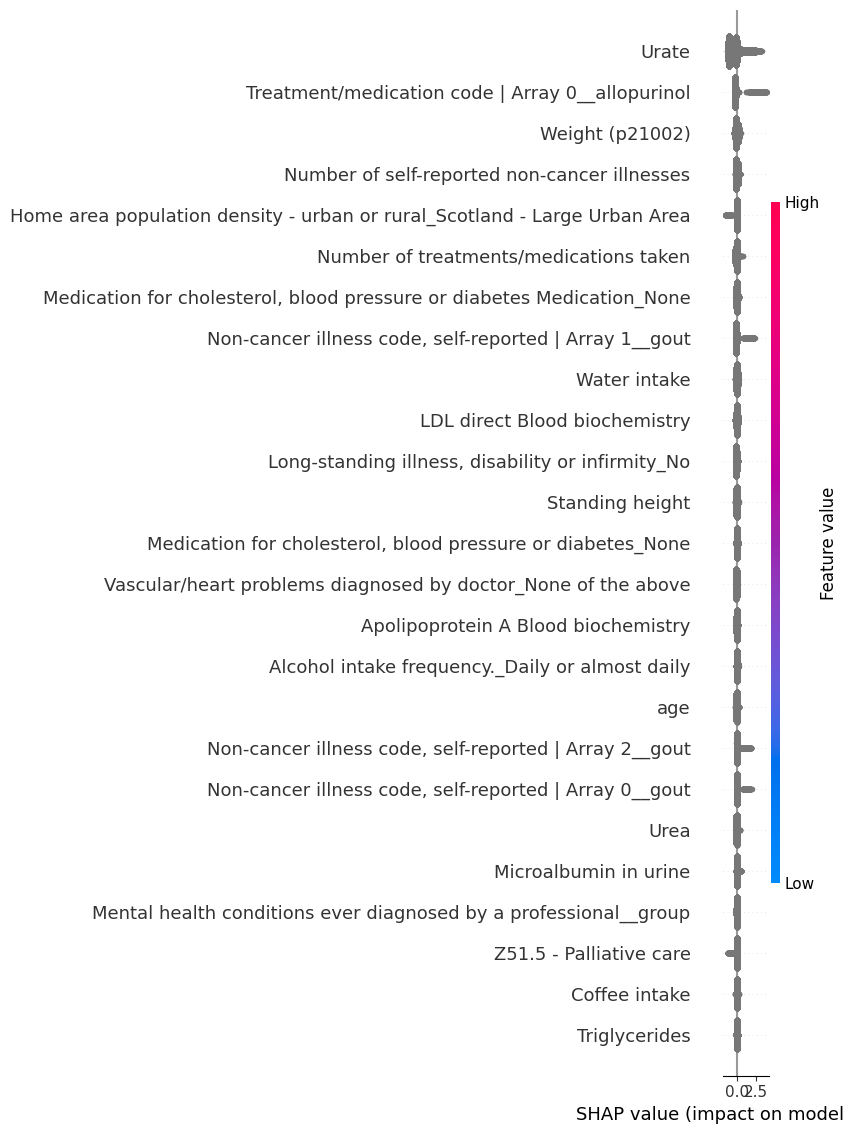

(91590, 2716)
2716 #all Features
1854 # minimally filtered features


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

1854 # feat after second filt
Getting lift stats
gout_feature_report.csv Saved
cutoff_shap: 0.00021
After filtering KG min count
12915192
TARGET_NAME (For Entity-KG linking Gout
All ents (Gout,)
Gout C0018099

--------------------------

Name:  Gout
CUI: C0018099, Name: Gout
Definition: Metabolic disorder characterized by recurrent acute arthritis, hyperuricemia and deposition of sodium urate in and around the joints, sometimes with formation of URIC ACID calculi.
TUI(s): T047
Aliases: (total: 10): 
	 GOUT, gout disorder, Gout, NOS, Gout, Gout, unspecified, Inflammatory disorder due to increased blood urate level (disorder), gout, Inflammatory disorder due to increased blood urate level, Gouts, gouts
list_target_cuis ['C0018099']


/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/scispacy/abbreviation.py:248: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  global_matches = self.global_matcher(doc)
/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/scispacy/abbreviation.py:248: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  global_matches = self.global_matcher(doc)
/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/scispacy/abbreviation.py:248: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  global_matches = self.global_matcher(doc)
/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/scispacy/abbreviation.py:248: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  global_matches = self.global_matcher(doc)
/home/ddofer/anaconda3/envs/Medrag/lib/python3.11/site-packages/scispacy/abbreviation.py:248: UserWarning: [W036] The component 

113 - No Entity feats:['Medication for cholesterol, blood pressure or diabetes Medication Blood pressure medication', 'Mental health conditions ever diagnosed by a professional group', 'medication arcoxia', 'Home area population density - urban or rural Scotland - Large Urban Area', 'Neuroticism score', 'medication tablet', 'Complications of transplants and reattached limbs', 'M19.99 - Arthrosis, unspecified (Site unspecified)', 'Concentration of Small LDL Particles', 'Age angina diagnosed', 'Long-standing illness, disability or infirmity', 'Vascular/heart problems diagnosed by doctor Angina', 'Qualifications A levels/AS levels or equivalent|O levels/GCSEs or equivalent|Other professional qualifications eg: nursing, teaching', 'Cholesterol in Small VLDL', 'Job code at visit officers', 'Vascular/heart problems diagnosed by doctor Heart attack', 'Job code at visit sales', 'Weight (p21002)', 'dietary changes in the last 5 years Yes, because of other reasons', 'I48.9 - Atrial fibrillation 

Calculating Paths: 100%|███████████████████████████████████████████████████████████████████████████| 239/239 [00:16<00:00, 14.10it/s]


(239, 3) df_path_lengths
(433, 19) df_hits
candidate_novel_cuis_gout.csv
feature_name             189
cui                      212
cui_nomenclature         212
cui_def                  212
raw_name                 189
F.Split-Feature Split    189
dtype: int64


,feature_name,cui,cui_nomenclature,cui_def,KG_Hits,sim_score,feature_level_min_kg_hits,feature_level_sum_kg_hits,feature_level_avg_kg_hits,feature_importance,p_val,corr,MutualInfoTarget,raw_name,F.Split-Lift (y==1),F.Split-Support,F.Split-Feature Split,sim_score_target_feat,sim_score_target_cui,shortest_path_length
0,Weight (p21002),C0005910,Body Weight,Body Weight. The mass or quantity of heaviness...,0,0.481,0.0,0.0,0.0,0.1297,0.0,0.044,0.0075,Weight (p21002),1.29,9277,1.20 <= Weight (p21002) < 3.80,0.07,0.07,2
1,Weight (p21002),C0043100,Weight,Weight. The vertical force exerted by a mass a...,0,0.488,0.0,0.0,0.0,0.1297,0.0,0.044,0.0075,Weight (p21002),1.29,9277,1.20 <= Weight (p21002) < 3.80,0.07,0.07,2
2,Number of self-reported non-cancer illnesses,C2700446,Self-Report,Self-Report. An individual's perspective or su...,0,0.411,0.0,0.0,0.0,0.0938,0.0,0.138,0.0101,Number of self-reported non-cancer illnesses,2.36,1149,Number of self-reported non-cancer illnesses >...,0.10,0.10,2
3,Home area population density - urban or rural ...,C0178587,density,density. The amount of something per unit size.,0,0.243,0.0,0.0,0.0,0.0812,0.0,-0.052,0.0018,Home area population density - urban or rural_...,1.04,87079,Home area population density - urban or rural_...,-0.06,0.01,2
4,Home area population density - urban or rural ...,C0442529,Urban environment,Urban environment. A delineated geographic are...,0,0.319,0.0,0.0,0.0,0.0812,0.0,-0.052,0.0018,Home area population density - urban or rural_...,1.04,87079,Home area population density - urban or rural_...,-0.06,0.01,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,Alcohol intake frequency. One to three times a...,,,,0,1.000,0.0,0.0,0.0,0.0012,0.0,-0.028,0.0004,Alcohol intake frequency._One to three times a...,1.03,82577,Alcohol intake frequency._One to three times a...,-0.03,-0.03,2
429,Hip circumference,,,,0,1.000,0.0,0.0,0.0,0.0211,0.0,0.022,0.0023,Hip circumference,1.21,1302,2.80 <= Hip circumference < 4.50,0.08,0.09,2
430,"Medication for cholesterol, blood pressure or ...",,,,0,1.000,0.0,0.0,0.0,0.0007,0.0,-0.072,0.0027,"Medication for cholesterol, blood pressure or ...",1.18,53208,"Medication for cholesterol, blood pressure or ...",0.04,0.04,2
431,Concentration of IDL Particles,,,,0,1.000,0.0,0.0,0.0,0.0024,0.0,-0.033,0.0604,Concentration of IDL Particles,1.43,2252,-3.80 <= Concentration of IDL Particles < -2.40,0.00,0.00,2


['Home area population density - urban or rural Scotland - Large Urban Area', 'Long-standing illness, disability or infirmity', 'Vascular/heart problems diagnosed by doctor None of the above', 'Alcohol intake frequency. Daily or almost daily', 'age', 'Urea', 'Microalbumin in urine', 'Mental health conditions ever diagnosed by a professional group']
['Urate', 'Treatment/medication code | Array 0 allopurinol', 'Home area population density - urban or rural_Scotland - Large Urban Area', 'Medication for cholesterol, blood pressure or diabetes Medication_None', 'Non-cancer illness code, self-reported | Array 1 gout', 'Long-standing illness, disability or infirmity_No', 'Medication for cholesterol, blood pressure or diabetes_None', 'Vascular/heart problems diagnosed by doctor_None of the above']
Targets: ['Gout']
NOTE: Imputing KG_Hits col
250 # df_query rows
name                         250
feature_importance           191
p_val                        132
corr                         100
co

Targets: ['Gout']


53 boring_feature_names
 ['Secondary malignancy of bone', 'Long-standing illness, disability or infirmity_No', 'Other peripheral nerve disorders', 'Basophill count', 'Overall health rating_Good', 'Alcohol-related disorders', 'Apolipoprotein A1', 'Abdominal pain', 'Total protein', 'Apolipoprotein B', 'Hip circumference', '(RA) rheumatoid arthritis genetic risk', 'Age heart attack diagnosed', 'Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones_None', 'Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones_Blood pressure medication', 'Medication for cholesterol, blood pressure, diabetes, or take exogenous hormones_Cholesterol lowering medication', 'Essential hypertension', 'Albumin', 'Medication for cholesterol, blood pressure or diabetes_Cholesterol lowering medication|Blood pressure medication|Insulin', 'Osteoarthrosis, localized, primary', 'Age high blood pressure diagnosed_None', 'Coronary atherosclerosis', 'Age diabetes diagnose

Targets: ['Gout']


Query                    127
name                     127
raw_name                 127
F.Split-Feature Split    127
feature_name             127
cui                        0
Target                     1
dtype: int64
95 # rows after feature_level_avg_kg_hits filter
95 # rows after (local)sim_score filter
95 # rows after query-target count filter
92
127 # Overall candidate features
92 # Top pick candidate features
92
95 # rows after feature_level_avg_kg_hits filter
95 # rows after (local)sim_score filter
95 # rows after query-target count filter
92
['Microalbumin in urine', 'Arm fat percentage (left)', 'Qualifications_None of the above', 'Leg fat-free mass (right)', '(MS) multiple sclerosis genetic risk', 'Long-standing illness, disability or infirmity_Yes', '(HDL) high density lipoprotein cholesterol genetic risk', 'had_disease_past', 'Home area population density - urban or rural_Scotland - Other Urban Area', '(CVD) cardiovascular disease genetic risk']
--------------------------------

,feature_name,feature_importance,corr,source-shap,source-KG,source-lit,source-Joint-Shap_Lit
0,(CVD) cardiovascular disease genetic risk,0.01,0.0,0,0,1,0
1,(HDL) high density lipoprotein cholesterol gen...,0.016,0.0,0,0,1,1
2,(MS) multiple sclerosis genetic risk,0.021,0.0,0,0,1,1
3,3-Hydroxybutyrate,0.0,0.0,0,0,0,1
4,Acetone,0.0,0.0,0,0,0,1
5,Alcohol intake frequency._Daily or almost daily,0.042,0.0,0,1,0,0
6,Apolipoprotein A Blood biochemistry,0.043,-0.012,1,1,1,1
7,Arm fat percentage (left),0.024,0.0,0,0,1,0
8,Congestive heart failure (CHF) NOS,0.0,0.0,0,0,0,1
9,Date of all cause dementia report,0.0,0.0,0,0,0,1


In [7]:
for config in all_configs:
    print("-----"*35,"\n"*2,config["TARGET_NAME"],"\n"*2,"-----"*35)
    if RUN_PIPE == False:
        df = pd.read_parquet(config["OUTPUT_RES_PREFIX"]+"_test_df.parquet")

    if Fast_Run:
        df = ipw_downsampling(df, K_IPW_RATIO=2).sample(frac=0.3)
    print(df.shape)
    display(df.head(2))
    
    res_dict = model_features(df=df, FAST=Fast_Run, do_boruta_fs=False,
                              SAVE_OUTPUT=SAVE_OUTPUT, FEATURES_REPORT_PATH=config["FEATURES_REPORT_PATH"],
                              # keep_top_k_only=True, # keep top ~400 feats by MI; speed things up; not working!
                             do_mi_fs_filt=True)
    df_feat_sel = res_dict['feature_importance_df'].sort_values("feature_importance",ascending=False)
    df_raw = df.copy()
    df_feat_sel["name"] = df_feat_sel["name"].str.replace("__"," ",regex=False)

    df_feat_sel = df_feat_sel.loc[df_feat_sel['p_val']<0.8]

    cutoff_shap = df_feat_sel.loc[df_feat_sel["feature_importance"].abs() > 0, "feature_importance"].quantile(0.5)
    print("cutoff_shap:",cutoff_shap)
    df_feat_sel = df_feat_sel.loc[(df_feat_sel['p_val']<0.25) | (df_feat_sel['feature_importance'].abs()>cutoff_shap)].drop_duplicates(subset="name") ## filter some really whacky features. Not necessarily done in full pipe? 
    df_feat_sel.reset_index(drop=True,inplace=True)
    df_feat_sel = df_feat_sel.head(250)

    df_feat_sel["feature_name"] = df_feat_sel["name"].str.replace("__"," ",regex=False) ## add col
    df_feat_sel["cui_nomenclature"] = df_feat_sel["feature_name"]  # add dummy col
    df_feat_sel["feature_level_min_kg_hits"] = 0          # safe default
    df_feat_sel["feature_level_sum_kg_hits"] = 0          # NEW  (only used for sorting)
    df_feat_sel["sim_score"]                 = 0.0        # NEW  (only used for sorting)

    if DO_KG:
        df_kg_hits = link_kg_concepts(FEATURES_REPORT_PATH=config["FEATURES_REPORT_PATH"], CANDIDATE_NOVEL_CUIS_FILEPATH=config["CANDIDATE_NOVEL_CUIS_FILEPATH"],
                 TARGET_NAME=config["TARGET_NAME"],
                 df_features=df_feat_sel,
                 SAVE_OUTPUTS=SAVE_OUTPUT).drop_duplicates(subset="feature_name").sort_values("feature_importance",ascending=False)
        
        ## This doesn't work completely  for clarifying changes, some feature names differ.
        print ([c for c in df_kg_hits.head(15)["feature_name"] if c not in df_feat_sel.head(15)["name"].values]) 
        
        print ([c for c in df_feat_sel.head(15)["name"]  if c not in df_kg_hits.head(15)["feature_name"].values]) 
        
        # if SAVE_OUTPUT: df_kg_hits.head(300).to_csv(f"./Outputs/ablation/{config['TARGET_NAME']}_ablation_kg_candidates.csv",index=False)
    config2 = config.copy()
    # config['QUERY_CANDIDATES_FILE'] ## 'candidate_novel_cuis_chol.csv'
    # df_feat_sel["feature_name"] = df_feat_sel["name"].str.replace("__"," ",regex=False) ## add col
    # df_feat_sel["cui_nomenclature"] = df_feat_sel["feature_name"]  # add dummy col
    # df_feat_sel["feature_level_min_kg_hits"] = 0          # safe default
    # df_feat_sel["feature_level_sum_kg_hits"] = 0          # NEW  (only used for sorting)
    # df_feat_sel["sim_score"]                 = 0.0        # NEW  (only used for sorting)
    
    config['QUERY_CANDIDATES_FILE'] = f"./Outputs/ablation/{config['TARGET_NAME']}_ablation_shap_candidates.csv"
    # df_feat_sel.to_csv(f"./Outputs/ablation/{config["TARGET_NAME"]}_ablation_shap_candidates.csv",index=False)
    df_feat_sel.to_csv(config['QUERY_CANDIDATES_FILE'],index=False) # need to save to disk for pubmed/lit search to work
    
    df_litSearch = run_search_pubmed(config,SAVE_OUTPUTS=SAVE_OUTPUT).sort_values("feature_importance",ascending=False).drop_duplicates(subset="Query")

    # Get promising results
    df_litSearch = get_promising_results(df_litSearch, SIGNIFICANT_PVAL=config.get('SIGNIFICANT_PVAL'), Drop_Query_Cui_Info=True,# filter_joint_pathlength=True
                                        ).sort_values("feature_importance",ascending=False).drop_duplicates(subset=["feature_name"])
    
    print ([c for c in df_litSearch.head(15)["feature_name"] if c not in df_feat_sel.head(15)["name"].values]) 
    if SAVE_OUTPUT:
        df_litSearch.to_csv(f"./Outputs/ablation/{config['TARGET_NAME']}_ablation_lit_candidates.csv",index=False)

    print("-----"*35,"\n"*2,"df3"*2,"-----"*35)
    ## add additional - run of all novelty filters, like in normal pipe; but pre ll. (Steps 1,2,3) 
    ### i.e cases after both novelty filters
    # df_3 =run_search_pubmed(config,
    #                         # df=df_kg_hits, # not wokring, use config as workjaround
    #                         SAVE_OUTPUTS=SAVE_OUTPUT).sort_values("feature_importance",ascending=False).drop_duplicates(subset="Query")
    # df_3= get_promising_results(df_3, SIGNIFICANT_PVAL=config.get('SIGNIFICANT_PVAL'), Drop_Query_Cui_Info=True,
    #                                     ).sort_values("feature_importance",ascending=False).drop_duplicates(subset=["feature_name"])
    df_3 = df_kg_hits.loc[df_kg_hits["feature_name"].isin(df_litSearch["feature_name"])].sort_values("feature_importance",ascending=False).drop_duplicates(subset=["feature_name"])
    if SAVE_OUTPUT:
        df_3.to_csv(f"./Outputs/ablation/{config['TARGET_NAME']}_ablation_novel_candidates.csv",index=False)
    df_3 = df_3[["feature_name","feature_importance"]]
    df_3 = df_3[["feature_name"]]
    df_3["source-Joint-Shap_Lit"]=1
    # # Features in df_litSearch but not in df_3
    print("Features in df_litSearch but not in df_3")
    print([c for c in df_litSearch.head(15)["feature_name"] if c not in df_3.head(15)["feature_name"].values])
    
    # # Features in df_3 but not in df_litSearch
    print(" Features in df_3 but not in df_litSearch")
    print([c for c in df_3.head(15)["feature_name"] if c not in df_litSearch.head(15)["feature_name"].values])
    
    ##temp disable 
    if SAVE_OUTPUT:
        ## put all candidates in 1 list for more effecient annotation; mark their source for those appearing in multiple
        df_res = df_feat_sel[["feature_name","feature_importance",#"p_val",
                              "corr"
                             ]].sort_values("feature_importance",ascending=False).head(15)
        df_res["source-shap"]=1
        ### note raw name in KG - feature name here is "cleaner" (but differs in other dfs)
        ### e.g.  Arm fat percentage (left)	 > Arm fat percentage	 
        # df_kg_temp = df_kg_hits.head(15)[["raw_name","feature_name","feature_importance","p_val","corr"]] 
        df_kg_temp = df_kg_hits[["raw_name","feature_importance"]].rename(columns={"raw_name":"feature_name"})
        df_kg_temp["feature_name"] = df_kg_temp["feature_name"].str.replace("__"," ",regex=False) # add here
        df_kg_temp = df_kg_temp.drop_duplicates(subset=["feature_name"]).head(15)
        df_kg_temp["source-KG"]=1
        # df_lit_temp = df_litSearch.head(15)[["feature_name","feature_importance","p_val","corr"]]
        df_lit_temp = df_litSearch[["feature_name","feature_importance"]]
        df_lit_temp["feature_name"] = df_lit_temp["feature_name"].str.replace("__"," ",regex=False) # add here
        df_lit_temp = df_lit_temp.drop_duplicates(subset=["feature_name"]).head(15)
        
        df_lit_temp["source-lit"]=1
        
        # , suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')
        df_res = df_res.merge(df_kg_temp,on="feature_name",how="outer").drop(columns="raw_name",errors="ignore")
        df_res["feature_importance_x"].fillna(df_res["feature_importance_y"],inplace=True)
        df_res.drop(columns=["feature_importance_y"],inplace=True,errors="ignore")
        df_res = df_res.merge(df_lit_temp,on="feature_name",how="outer")
        
        df_res["feature_importance_x"].fillna(df_res["feature_importance"],inplace=True)
        df_res = df_res.drop(columns=["feature_importance"],errors="ignore").rename(columns={"feature_importance_x":"feature_importance"})

        df_res = df_res.merge(df_3.head(15),on="feature_name",how="outer", suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')
        
        df_res = df_res.fillna(0)
        df_res = df_res.convert_dtypes().round(3)
        df_res["feature_name"] = df_res["feature_name"].str.replace("__"," ",regex=False)
        df_res = df_res.groupby("feature_name").max().reset_index() 
        print(df_res.feature_name.values)
        
        display(df_res)
        df_res["Target"]=config['TARGET_NAME']
        # df_res["Interesting?"] = None
        df_res.round(2).to_csv(f"./Outputs/ablation/{config['TARGET_NAME']}_ablation_candidates.csv",index=False)
        
        # df_res

In [9]:
# df_3 =run_search_pubmed(config,df=df_kg_hits,SAVE_OUTPUTS=SAVE_OUTPUT).sort_values("feature_importance",ascending=False).drop_duplicates(subset="Query")
# df_3= get_promising_results(df_litSearch, SIGNIFICANT_PVAL=config.get('SIGNIFICANT_PVAL'), Drop_Query_Cui_Info=True,
#                                     ).sort_values("feature_importance",ascending=False).drop_duplicates(subset=["feature_name"])

# # Features in df_litSearch but not in df_3
# print("Features in df_litSearch but not in df_3")
# print([c for c in df_litSearch["feature_name"] if c not in df_3["feature_name"].values])

# # Features in df_3 but not in df_litSearch
# print(" Features in df_3 but not in df_litSearch")
# print([c for c in df_3["feature_name"] if c not in df_litSearch["feature_name"].values])

In [10]:
df_raw.loc[:,df_raw.columns.str.contains("smok|cig",case=False)].describe()

,Amount of tobacco currently smoked
count,465
unique,26
top,"No cigarettes, only smoke cigars or pipes"
freq,80


In [11]:
# df_raw["Amount of tobacco currently smoked"].value_counts()

In [12]:
print(df_res.feature_name.values)
df_res

<StringArray>
[                                '(CVD) cardiovascular disease genetic risk',
                   '(HDL) high density lipoprotein cholesterol genetic risk',
                                      '(MS) multiple sclerosis genetic risk',
                                                         '3-Hydroxybutyrate',
                                                                   'Acetone',
                           'Alcohol intake frequency._Daily or almost daily',
                                       'Apolipoprotein A Blood biochemistry',
                                                 'Arm fat percentage (left)',
                                        'Congestive heart failure (CHF) NOS',
                                         'Date of all cause dementia report',
 'Home area population density - urban or rural_Scotland - Large Urban Area',
 'Home area population density - urban or rural_Scotland - Other Urban Area',
                                             'LDL 

,feature_name,feature_importance,corr,source-shap,source-KG,source-lit,source-Joint-Shap_Lit,Target
0,(CVD) cardiovascular disease genetic risk,0.01,0.0,0,0,1,0,Gout
1,(HDL) high density lipoprotein cholesterol gen...,0.016,0.0,0,0,1,1,Gout
2,(MS) multiple sclerosis genetic risk,0.021,0.0,0,0,1,1,Gout
3,3-Hydroxybutyrate,0.0,0.0,0,0,0,1,Gout
4,Acetone,0.0,0.0,0,0,0,1,Gout
5,Alcohol intake frequency._Daily or almost daily,0.042,0.0,0,1,0,0,Gout
6,Apolipoprotein A Blood biochemistry,0.043,-0.012,1,1,1,1,Gout
7,Arm fat percentage (left),0.024,0.0,0,0,1,0,Gout
8,Congestive heart failure (CHF) NOS,0.0,0.0,0,0,0,1,Gout
9,Date of all cause dementia report,0.0,0.0,0,0,0,1,Gout


In [13]:
df_res.groupby("feature_name").max().shape

(37, 7)

In [14]:
df

,eid,YOB,Sex,instance0_date,y,past disease history - Age_at_diagnosis,past disease history - Z-score-Age_at_diagnosis,had_disease_past,age,cutoff_date,...,Date of vascular dementia report,Behavioural and miscellaneous addictions,Ever addicted to any substance or behaviour,Ongoing addiction or dependence on illicit or recreational drugs,Ever addicted to a behaviour or miscellanous,Ever addicted to illicit or recreational drugs,Date elapsed of all cause dementia report,Date elapsed of alzheimer's disease report,Date elapsed of vascular dementia report,age_X_sex
0,3893629,1951,0,2008-06-20,1,NaN,NaN,False,58,2009-11-13,...,NaT,None,No,None,None,None,NaN,NaN,NaN,-1
1,2971195,1956,0,2009-10-30,1,NaN,NaN,False,65,2021-07-09,...,NaT,None,None,None,None,None,NaN,NaN,NaN,-1
2,1079498,1961,0,2009-06-15,1,49.0,-1.829565,True,49,2010-08-30,...,NaT,None,None,None,None,None,NaN,NaN,NaN,-1
3,2079236,1948,0,2009-03-12,1,NaN,NaN,False,67,2015-10-16,...,NaT,None,None,None,None,None,NaN,NaN,NaN,-1
4,4831424,1944,0,2010-01-25,1,NaN,NaN,False,75,2019-09-26,...,NaT,None,None,None,None,None,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91585,4491246,1955,0,2010-04-10,0,NaN,NaN,False,65,2020-07-10,...,NaT,None,None,None,None,None,NaN,NaN,NaN,-1
91586,5529226,1950,0,2009-05-21,0,NaN,NaN,False,63,2013-12-19,...,NaT,None,None,None,None,None,NaN,NaN,NaN,-1
91587,1277718,1941,0,2010-05-11,0,NaN,NaN,False,76,2017-11-21,...,NaT,None,None,None,None,None,NaN,NaN,NaN,-1
91588,5725577,1945,0,2008-12-02,0,NaN,NaN,False,74,2019-08-13,...,NaT,None,None,None,None,None,NaN,NaN,NaN,-1


### Alt - get kg+lit joint cands - posthoc
* differs from generating - use to compare them for post dated eval ablation (cases that overlap but which also appear in both)

* Get novel cases by kg (or lit), then filter them for cases in lit (or KG) (not just top 15 there) to ensure fair checking, then update in final table with annotators ("Ablation Candidates - InterFeat" - in google sheets)



In [43]:
## get all cases and get the new kg+lit cases, we'll add them in

df = pd.read_csv(f"./Outputs/ablation/GALLSTONES, Cholelithiasis_ablation_candidates.csv").query("`source-Joint-Shap_Lit`>0")
assert df.shape[0]==15
df = df.loc[~df["feature_name"].isin(dfs['Gallstones']["feature_name"])]
print(df.shape[0])
print(df["feature_name"])
df.to_csv("./Outputs/ablation/minimerge/gall.csv",index=False)


df = pd.read_csv(f"./Outputs/ablation/Gout_ablation_candidates.csv").query("`source-Joint-Shap_Lit`>0")
assert df.shape[0]==15
df = df.loc[~df["feature_name"].isin(dfs['Gout']["feature_name"])]
print(df.shape[0])
print(df["feature_name"])
df.to_csv("./Outputs/ablation/minimerge/gout.csv",index=False)


df = pd.read_csv(f"./Outputs/ablation/Esophageal cancer_ablation_candidates.csv").query("`source-Joint-Shap_Lit`>0")
assert df.shape[0]==15
df = df.loc[~df["feature_name"].isin(dfs['Oesophagus Cancer']["feature_name"])]
print(df.shape[0])
print(df["feature_name"])
df.to_csv("./Outputs/ablation/minimerge/OesophagusCancer.csv",index=False)

10
0                (AD) alzheimer's disease genetic risk
1            (CVD) cardiovascular disease genetic risk
2                       (HT) hypertension genetic risk
4               (RA) rheumatoid arthritis genetic risk
5     (VTE) venous thromboembolic disease genetic risk
9          Apolipoprotein B to Apolipoprotein A1 ratio
11                     Atrial fibrillation and flutter
12                  Congestive heart failure (CHF) NOS
13                   Date of all cause dementia report
27                         Pulse wave reflection index
Name: feature_name, dtype: object
10
3                      3-Hydroxybutyrate
4                                Acetone
8     Congestive heart failure (CHF) NOS
9      Date of all cause dementia report
12         LDL direct Blood biochemistry
16    Mean platelet (thrombocyte) volume
21                     Neuroticism score
25           Pulse wave reflection index
27                                  SHBG
34                       Weight (p21002)


PermissionError: [Errno 13] Permission denied: './Outputs/ablation/minimerge/OesophagusCancer.csv'

In [32]:
dfs = pd.read_excel("./Outputs/ablation/Ablation Candidates - merged.xlsx",sheet_name=None) # multiple sheets
df_gall = dfs['Gallstones'].query("`source-KG`>0")
# df_gall = df_gall.loc[df_gall["source-lit"]>0] # filter by lit as base
# df_gall = df_gall.loc[df_gall["source-KG"]>0] # filter by kg as base - we don't have kg intermediates currently saved , so we could use this first

df_lit = pd.read_csv(f"./Outputs/ablation/{config['TARGET_NAME']}_ablation_lit_candidates.csv")

assert df_gall.shape[0]==15
assert df_lit.shape[0]>20 # make sure going over "full" list
display(df_gall)

,feature_name,source-shap,source-KG,source-lit,Target,feature_importance,ai-explanation,Interesting Overall-pred,pred-Novel,pred-Plausible,pred-Utility,pred-Interesting,ML (rank 1-4) 4 being most novel/ interesting,Column2,pick
1,Alcohol intake frequency._Daily or almost daily,0,1,0,"GALLSTONES, Cholelithiasis",0.040,Complex: heavy intake is a risk factor (known)...,0,2,3,3,2,2,might be related through liver / billary funct...,0
2,Apolipoprotein A Blood biochemistry,1,1,1,"GALLSTONES, Cholelithiasis",0.043,Low ApoA-I (HDL component) linked to metabolic...,0,2,3,3,2,0,well known,0
3,Apolipoprotein B Blood biochemistry,1,1,1,"GALLSTONES, Cholelithiasis",0.061,High ApoB (LDL component) linked to metabolic ...,0,2,4,3,2,0,well known,0
5,Coffee intake,0,1,0,"GALLSTONES, Cholelithiasis",0.038,Most studies suggest coffee is protective. Pos...,1,4,2,3,4,3,indirect,1
6,Haemoglobin concentration,1,1,0,"GALLSTONES, Cholelithiasis",0.041,Low Hb (hemolytic anemias) is a known risk for...,1,3,2,2,3,4,if true -interesting,1
7,Home area population density - urban or rural_...,1,1,1,"GALLSTONES, Cholelithiasis",0.090,Proxy for lifestyle/SES factors which are indi...,0,2,2,2,1,0,too generic,0
9,"Long-standing illness, disability or infirmity...",1,1,1,"GALLSTONES, Cholelithiasis",0.049,General marker of poorer health; many chronic ...,0,1,3,1,1,0,too generic,0
12,"Non-cancer illness code, self-reported | Array...",1,1,1,"GALLSTONES, Cholelithiasis",0.068,Gout/hyperuricemia are linked to metabolic syn...,0,1,3,2,1,2,"fatty liver , metabolic syndromes",0
15,Number of self-reported non-cancer illnesses,1,1,0,"GALLSTONES, Cholelithiasis",0.097,Higher comorbidity burden expected to increase...,0,1,3,1,1,0,too generic,0
16,Number of treatments/medications taken,1,1,0,"GALLSTONES, Cholelithiasis",0.058,Polypharmacy indicates more health issues (kno...,0,1,3,1,1,0,too generic,0


In [34]:
df_gall.loc[df_gall["feature_name"].isin(df_lit["feature_name"])]

,feature_name,source-shap,source-KG,source-lit,Target,feature_importance,ai-explanation,Interesting Overall-pred,pred-Novel,pred-Plausible,pred-Utility,pred-Interesting,ML (rank 1-4) 4 being most novel/ interesting,Column2,pick
2,Apolipoprotein A Blood biochemistry,1,1,1,"GALLSTONES, Cholelithiasis",0.043,Low ApoA-I (HDL component) linked to metabolic...,0,2,3,3,2,0,well known,0
3,Apolipoprotein B Blood biochemistry,1,1,1,"GALLSTONES, Cholelithiasis",0.061,High ApoB (LDL component) linked to metabolic ...,0,2,4,3,2,0,well known,0
7,Home area population density - urban or rural_...,1,1,1,"GALLSTONES, Cholelithiasis",0.090,Proxy for lifestyle/SES factors which are indi...,0,2,2,2,1,0,too generic,0
9,"Long-standing illness, disability or infirmity...",1,1,1,"GALLSTONES, Cholelithiasis",0.049,General marker of poorer health; many chronic ...,0,1,3,1,1,0,too generic,0
12,"Non-cancer illness code, self-reported | Array...",1,1,1,"GALLSTONES, Cholelithiasis",0.068,Gout/hyperuricemia are linked to metabolic syn...,0,1,3,2,1,2,"fatty liver , metabolic syndromes",0


In [35]:
df_gall.loc[~df_gall["feature_name"].isin(df_lit["feature_name"])]

,feature_name,source-shap,source-KG,source-lit,Target,feature_importance,ai-explanation,Interesting Overall-pred,pred-Novel,pred-Plausible,pred-Utility,pred-Interesting,ML (rank 1-4) 4 being most novel/ interesting,Column2,pick
1,Alcohol intake frequency._Daily or almost daily,0,1,0,"GALLSTONES, Cholelithiasis",0.040,Complex: heavy intake is a risk factor (known)...,0,2,3,3,2,2,might be related through liver / billary funct...,0
5,Coffee intake,0,1,0,"GALLSTONES, Cholelithiasis",0.038,Most studies suggest coffee is protective. Pos...,1,4,2,3,4,3,indirect,1
6,Haemoglobin concentration,1,1,0,"GALLSTONES, Cholelithiasis",0.041,Low Hb (hemolytic anemias) is a known risk for...,1,3,2,2,3,4,if true -interesting,1
15,Number of self-reported non-cancer illnesses,1,1,0,"GALLSTONES, Cholelithiasis",0.097,Higher comorbidity burden expected to increase...,0,1,3,1,1,0,too generic,0
16,Number of treatments/medications taken,1,1,0,"GALLSTONES, Cholelithiasis",0.058,Polypharmacy indicates more health issues (kno...,0,1,3,1,1,0,too generic,0
18,Standing height,1,1,1,"GALLSTONES, Cholelithiasis",0.050,Weak or inconsistent association with gallston...,0,2,2,1,1,0,not relevant,0
20,Treatment/medication code | Array 0 allopurinol,1,1,0,"GALLSTONES, Cholelithiasis",0.306,Allopurinol treats gout (lowers urate). Indica...,0,2,3,2,1,0,too generic,0
21,Urate,1,1,0,"GALLSTONES, Cholelithiasis",0.841,Elevated urate (hyperuricemia) is part of meta...,0,2,3,3,2,2,"fatty liver , metabolic syndromes",0
22,Water intake,1,1,0,"GALLSTONES, Cholelithiasis",0.049,Severe dehydration can concentrate bile. Minor...,0,2,2,2,1,0,too generic,0
23,Weight (p21002),1,1,1,"GALLSTONES, Cholelithiasis",0.150,Obesity (indicated by weight) is a well-establ...,0,1,4,4,1,1,"too generic, known especially after weight loss",0


In [30]:
df_lit

,feature_name,raw_name,feature_importance,p_val,corr,MutualInfoTarget,Co-occurrence Count,F.Split-Lift (y==1),F.Split-Feature Split,Query Count,Target,sim_score,Novel/Interesting?,Makes Sense?,COMMENTS
0,Home area population density - urban or rural_...,Home area population density - urban or rural_...,0.078,0.000,-0.052,0.002,0,1.04,Home area population density - urban or rural_...,285,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN
1,"Non-cancer illness code, self-reported | Array...","Non-cancer illness code, self-reported | Array...",0.059,0.000,0.223,0.013,0,6.78,"Non-cancer illness code, self-reported | Array...",58,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN
2,Apolipoprotein A Blood biochemistry,Apolipoprotein A Blood biochemistry,0.048,0.013,-0.012,0.010,0,1.15,-2.10 <= Apolipoprotein A Blood biochemistry <...,1135,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN
3,Arm fat percentage (left),Arm fat percentage (left),0.040,0.203,0.016,0.004,0,1.18,-0.01 <= Arm fat percentage (left) < 0.61,41,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN
4,Apolipoprotein B Blood biochemistry,Apolipoprotein B Blood biochemistry,0.039,0.000,-0.036,0.010,3,1.43,-1.60 <= Apolipoprotein B Blood biochemistry <...,903,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Occlusion of cerebral arteries,Occlusion of cerebral arteries,0.000,0.018,-0.005,0.000,1,1.00,-2.60 <= Occlusion of cerebral arteries < 0.04,10643,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN
84,"Non-cancer illness code, self-reported | Array...","Non-cancer illness code, self-reported | Array...",0.000,0.000,0.025,0.001,4,0.99,"Non-cancer illness code, self-reported | Array...",3304,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN
85,"Non-cancer illness code, self-reported | Array...","Non-cancer illness code, self-reported | Array...",0.000,0.000,0.035,0.000,4,1.00,"Non-cancer illness code, self-reported | Array...",3664,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN
86,Congenital anomalies of great vessels,Congenital anomalies of great vessels,0.000,0.170,0.005,0.000,4,1.00,-2.30 <= Congenital anomalies of great vessels...,10418,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN


In [19]:
df_gall.loc[df_gall["source-lit"]>0]

,feature_name,source-shap,source-KG,source-lit,Target,feature_importance,ai-explanation,Interesting Overall-pred,pred-Novel,pred-Plausible,pred-Utility,pred-Interesting,ML (rank 1-4) 4 being most novel/ interesting,Column2,pick
0,(MS) multiple sclerosis genetic risk,0,0,1,"GALLSTONES, Cholelithiasis",0.020,MS is autoimmune; some autoimmune conditions (...,1,3,2,2,3,4,very surprising. So if true -it is novel.,1
2,Apolipoprotein A Blood biochemistry,1,1,1,"GALLSTONES, Cholelithiasis",0.043,Low ApoA-I (HDL component) linked to metabolic...,0,2,3,3,2,0,well known,0
3,Apolipoprotein B Blood biochemistry,1,1,1,"GALLSTONES, Cholelithiasis",0.061,High ApoB (LDL component) linked to metabolic ...,0,2,4,3,2,0,well known,0
4,Arm fat percentage (left),0,0,1,"GALLSTONES, Cholelithiasis",0.023,Obesity is a known risk. Arm fat percentage is...,0,2,3,2,2,1,relevance to fat body distribution,0
7,Home area population density - urban or rural_...,1,1,1,"GALLSTONES, Cholelithiasis",0.090,Proxy for lifestyle/SES factors which are indi...,0,2,2,2,1,0,too generic,0
8,Home area population density - urban or rural_...,0,0,1,"GALLSTONES, Cholelithiasis",0.019,Similar to 'Large Urban Area'; proxy for lifes...,0,2,2,2,1,0,too generic,0
9,"Long-standing illness, disability or infirmity...",1,1,1,"GALLSTONES, Cholelithiasis",0.049,General marker of poorer health; many chronic ...,0,1,3,1,1,0,too generic,0
11,Microalbumin in urine,0,0,1,"GALLSTONES, Cholelithiasis",0.032,Marker of kidney damage/endothelial dysfunctio...,1,3,3,3,3,4,if true -interesting,1
12,"Non-cancer illness code, self-reported | Array...",1,1,1,"GALLSTONES, Cholelithiasis",0.068,Gout/hyperuricemia are linked to metabolic syn...,0,1,3,2,1,2,"fatty liver , metabolic syndromes",0
13,"Non-cancer illness code, self-reported | Array...",1,0,1,"GALLSTONES, Cholelithiasis",0.043,Same as Array 1 gout; reflects metabolic syndr...,0,1,3,2,1,2,"fatty liver , metabolic syndromes",0


In [8]:
# df_lit = pd.read_csv(f"./Outputs/ablation/{config['TARGET_NAME']}_ablation_lit_candidates.csv").head(15)
display(df_lit)

,feature_name,raw_name,feature_importance,p_val,corr,MutualInfoTarget,Co-occurrence Count,F.Split-Lift (y==1),F.Split-Feature Split,Query Count,Target,sim_score,Novel/Interesting?,Makes Sense?,COMMENTS
0,Home area population density - urban or rural_...,Home area population density - urban or rural_...,0.078,0.000,-0.052,0.002,0,1.04,Home area population density - urban or rural_...,285,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN
1,"Non-cancer illness code, self-reported | Array...","Non-cancer illness code, self-reported | Array...",0.059,0.000,0.223,0.013,0,6.78,"Non-cancer illness code, self-reported | Array...",58,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN
2,Apolipoprotein A Blood biochemistry,Apolipoprotein A Blood biochemistry,0.048,0.013,-0.012,0.010,0,1.15,-2.10 <= Apolipoprotein A Blood biochemistry <...,1135,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN
3,Arm fat percentage (left),Arm fat percentage (left),0.040,0.203,0.016,0.004,0,1.18,-0.01 <= Arm fat percentage (left) < 0.61,41,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN
4,Apolipoprotein B Blood biochemistry,Apolipoprotein B Blood biochemistry,0.039,0.000,-0.036,0.010,3,1.43,-1.60 <= Apolipoprotein B Blood biochemistry <...,903,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN
5,"Non-cancer illness code, self-reported | Array...","Non-cancer illness code, self-reported | Array...",0.037,0.000,0.193,0.010,0,6.61,"Non-cancer illness code, self-reported | Array...",56,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN
6,Microalbumin in urine,Microalbumin in urine,0.028,0.000,0.016,0.022,2,2.64,0.85 <= Microalbumin in urine < 7.50,899,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN
7,"Non-cancer illness code, self-reported | Array...","Non-cancer illness code, self-reported | Array...",0.023,0.000,0.162,0.007,0,0.96,"Non-cancer illness code, self-reported | Array...",49,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN
8,"Long-standing illness, disability or infirmity...","Long-standing illness, disability or infirmity...",0.023,0.000,0.087,0.004,0,1.30,"Long-standing illness, disability or infirmity...",205,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN
9,Tea intake,Tea intake,0.021,0.000,-0.019,0.001,8,1.09,-1.00 <= Tea intake < 0.09,3971,(Cholelithiasis) OR (Gallstone) OR (Gallbladde...,0.0,NaN,NaN,NaN


In [23]:
df_res = pd.read_csv(f"./Outputs/ablation/{config['TARGET_NAME']}_ablation_candidates.csv").query("`source-Joint-Shap_Lit`>0")
display(df_res.select_dtypes("O"))

,feature_name,Target
0,(AD) alzheimer's disease genetic risk,"GALLSTONES, Cholelithiasis"
1,(CVD) cardiovascular disease genetic risk,"GALLSTONES, Cholelithiasis"
2,(HT) hypertension genetic risk,"GALLSTONES, Cholelithiasis"
3,(MS) multiple sclerosis genetic risk,"GALLSTONES, Cholelithiasis"
4,(RA) rheumatoid arthritis genetic risk,"GALLSTONES, Cholelithiasis"
5,(VTE) venous thromboembolic disease genetic risk,"GALLSTONES, Cholelithiasis"
7,Apolipoprotein A Blood biochemistry,"GALLSTONES, Cholelithiasis"
8,Apolipoprotein B Blood biochemistry,"GALLSTONES, Cholelithiasis"
9,Apolipoprotein B to Apolipoprotein A1 ratio,"GALLSTONES, Cholelithiasis"
11,Atrial fibrillation and flutter,"GALLSTONES, Cholelithiasis"


In [26]:
df_res.loc[df_res["feature_name"].isin(df_gall["feature_name"])]

,feature_name,feature_importance,corr,source-shap,source-KG,source-lit,source-Joint-Shap_Lit,Target
3,(MS) multiple sclerosis genetic risk,0.02,0.00,0,0,1,1,"GALLSTONES, Cholelithiasis"
7,Apolipoprotein A Blood biochemistry,0.05,-0.01,1,1,1,1,"GALLSTONES, Cholelithiasis"
8,Apolipoprotein B Blood biochemistry,0.04,0.00,0,1,1,1,"GALLSTONES, Cholelithiasis"
21,Microalbumin in urine,0.03,0.00,0,0,1,1,"GALLSTONES, Cholelithiasis"
29,Tea intake,0.02,0.00,0,0,1,1,"GALLSTONES, Cholelithiasis"


In [27]:
df_res.loc[~df_res["feature_name"].isin(df_gall["feature_name"])]

,feature_name,feature_importance,corr,source-shap,source-KG,source-lit,source-Joint-Shap_Lit,Target
0,(AD) alzheimer's disease genetic risk,0.00,0.0,0,0,0,1,"GALLSTONES, Cholelithiasis"
1,(CVD) cardiovascular disease genetic risk,0.00,0.0,0,0,0,1,"GALLSTONES, Cholelithiasis"
2,(HT) hypertension genetic risk,0.00,0.0,0,0,0,1,"GALLSTONES, Cholelithiasis"
4,(RA) rheumatoid arthritis genetic risk,0.00,0.0,0,0,0,1,"GALLSTONES, Cholelithiasis"
5,(VTE) venous thromboembolic disease genetic risk,0.00,0.0,0,0,0,1,"GALLSTONES, Cholelithiasis"
9,Apolipoprotein B to Apolipoprotein A1 ratio,0.00,0.0,0,0,0,1,"GALLSTONES, Cholelithiasis"
11,Atrial fibrillation and flutter,0.01,0.0,0,0,1,1,"GALLSTONES, Cholelithiasis"
12,Congestive heart failure (CHF) NOS,0.00,0.0,0,0,0,1,"GALLSTONES, Cholelithiasis"
13,Date of all cause dementia report,0.00,0.0,0,0,0,1,"GALLSTONES, Cholelithiasis"
27,Pulse wave reflection index,0.00,0.0,0,0,0,1,"GALLSTONES, Cholelithiasis"
